# Capstone Project: Usingn CNNs to identify portraits of adults versus portraits of youth.
### Notebook 03: First Model, CNN1
Recommendation: Create a separate environment for keras 

citations:

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.utils import compute_class_weight

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import keras
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
# from keras import regularizers
# from keras.utils import load_img
# from PIL import Image

In [66]:
data_dir = '/Users/marta/Documents/data_dir/'

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(256, 256),
  batch_size = 32)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(256, 256),
  batch_size = 32)

Found 14633 files belonging to 2 classes.
Using 11707 files for training.
Found 14633 files belonging to 2 classes.
Using 2926 files for validation.


In [67]:
# help from argo

classes = np.array(['PLP', 'POR'])
y = [classes[0]] * 5422 + [classes[1]] * 9211
class_weights = compute_class_weight('balanced', classes=classes, y=y)

In [73]:
class_weights_dict = class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}
class_weights_dict

{0: 1.349409811877536, 1: 0.794322006296819}

In [74]:
# CNN 2: input layer + 2 hidden layers, changed filters to 3 and kernel size to 3
cnn2 = Sequential()

# Convoluting and MaxPooling
# input (which includes one hidden layer because Sequential does that)
cnn2.add(Conv2D(512, 3, # changed from 2
                activation = 'relu',
                input_shape = (256, 256, 3)))
cnn2.add(MaxPooling2D(2, padding = 'same'))

# add our first explicit hidden layer
cnn2.add(Conv2D(256, 
                3, 
                activation = 'relu',
               kernel_regularizer = regularizers.l2(0.01)))
cnn2.add(MaxPooling2D(2, padding = 'same'))

# adding a second hidden layer
cnn2.add(Conv2D(256, 
                3,
                activation = 'relu',
               kernel_regularizer = regularizers.l2(0.01)))
cnn2.add(MaxPooling2D(2, padding = 'same'))

# Output layer, with softmax activation because it's classification
# with as many neurons as there are classes
cnn2.add(Flatten())
cnn2.add(Dense(1, activation = 'sigmoid'))

# compiling the model
cnn2.compile(
    loss = 'binary_crossentropy', 
    optimizer = 'adam', 
    metrics = ['acc'])

In [75]:
 # Fit the model
 history2 = cnn2.fit(train_ds,
                    epochs = 10,
                    validation_data = val_ds, 
                    class_weight = class_weights_dict)

Epoch 1/10


2024-06-10 19:24:15.106545: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_17' with dtype double and shape [2]
	 [[{{node Placeholder/_17}}]]
2024-06-10 19:24:15.106808: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_17' with dtype double and shape [2]
	 [[{{node Placeholder/_17}}]]


366/366 [==============================] - ETA: 0s - loss: 8.9600 - acc: 0.5679

2024-06-10 20:22:33.908123: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2926]
	 [[{{node Placeholder/_0}}]]
2024-06-10 20:22:33.908265: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2926]
	 [[{{node Placeholder/_4}}]]


366/366 [==============================] - 3707s 10s/step - loss: 8.9600 - acc: 0.5679 - val_loss: 2.6904 - val_acc: 0.5800
Epoch 2/10
366/366 [==============================] - 3784s 10s/step - loss: 2.3329 - acc: 0.6064 - val_loss: 2.1807 - val_acc: 0.5249
Epoch 3/10
366/366 [==============================] - 3802s 10s/step - loss: 1.8594 - acc: 0.6446 - val_loss: 1.8764 - val_acc: 0.5198
Epoch 4/10
366/366 [==============================] - 3784s 10s/step - loss: 1.6045 - acc: 0.6720 - val_loss: 1.6501 - val_acc: 0.5810
Epoch 5/10
366/366 [==============================] - 3789s 10s/step - loss: 1.4022 - acc: 0.7017 - val_loss: 1.5312 - val_acc: 0.5954
Epoch 6/10
366/366 [==============================] - 3779s 10s/step - loss: 1.2366 - acc: 0.7250 - val_loss: 1.3931 - val_acc: 0.6128
Epoch 7/10
366/366 [==============================] - 3704s 10s/step - loss: 1.0767 - acc: 0.7618 - val_loss: 1.5165 - val_acc: 0.5687
Epoch 8/10
366/366 [==============================] - 3722s 10s/st

CNN1: loss: 0.4773 - acc: 0.7526 - val_loss: 0.5494 - val_acc: 0.7180
CNN2: loss: 0.3744 - acc: 0.8161 - val_loss: 0.6049 - val_acc: 0.7397
CNN2.1: loss: 0.7202 - acc: 0.8286 - val_loss: 1.6078 - val_acc: 0.5707

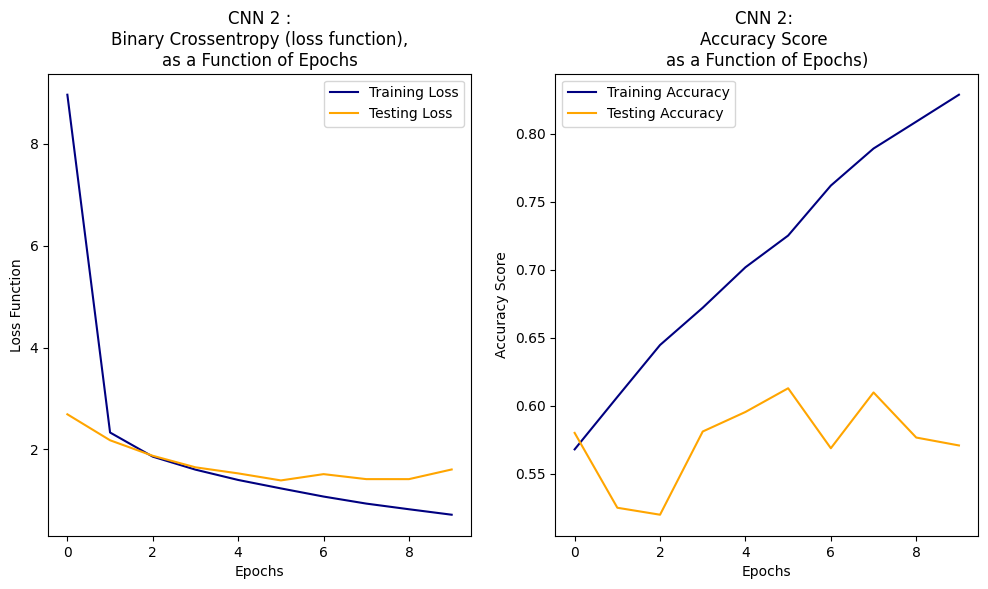

In [76]:
# Check out the plot of loss vs epoch.
plt.figure(figsize = (12, 6));

plt.subplot(1,2,1)
plt.plot(history2.history['loss'], c = 'navy', label = 'Training Loss');
plt.plot(history2.history['val_loss'], c = 'orange', label = 'Testing Loss');

plt.title('''CNN 2 :
Binary Crossentropy (loss function),
as a Function of Epochs''')
plt.xlabel('Epochs');
plt.ylabel('Loss Function')
plt.legend();


plt.subplot(1, 2, 2)
plt.plot(history2.history['acc'], c = 'navy', label = 'Training Accuracy');
plt.plot(history2.history['val_acc'], c = 'orange', label = 'Testing Accuracy');
plt.title('''CNN 2: 
Accuracy Score 
as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Accuracy Score')
plt.legend();

In [55]:
# CNN: compile. 
# activation = relu
# final activation = sigmoid, 
# loss function = binary cross entropy,
# track accuracy - for graphing to see how things are going
# track TP, FP, TN, FN?
# confusion matrix- slack from Hank
# stretchgoal: streamlit app
# pre-trained model (VGG, ResNet)
# research! bounding boxes from openCV
# unbalanced data classes
# no pickles for keras. use the keras prefered method


# CNN: Architecture (VGG?- pre loaded, can try right now. , ResNet?, my own?)

In [114]:
cnn1.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 255, 255, 512)     6656      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 127, 127, 512)    0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 126, 126, 64)      131136    
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 254016)            0         
                                                                 
 dense_15 (Dense)            (None, 1)               

# Check out the plot of loss vs epoch.
plt.figure(figsize = (12, 6));

plt.subplot(1,2,1)
plt.plot(history.history['loss'], c = 'navy', label = 'Training Loss');
plt.plot(history.history['val_loss'], c = 'orange', label = 'Testing Loss');

plt.title('''CNN 1 :
Binary Crossentropy (loss function),
as a Function of Epochs''')
plt.xlabel('Epochs');
plt.ylabel('Loss Function')
plt.legend();


plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], c = 'navy', label = 'Training Accuracy');
plt.plot(history.history['val_acc'], c = 'orange', label = 'Testing Accuracy');
plt.title('''CNN 1: 
Accuracy Score 
as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Accuracy Score')
plt.legend();

results:

CNN1: loss: 0.4773 - acc: 0.7526 - val_loss: 0.5494 - val_acc: 0.7180
